In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle dataset list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 89% 132M/149M [00:00<00:00, 255MB/s]
100% 149M/149M [00:00<00:00, 221MB/s]


In [ ]:
import os
import shutil
import random
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
import time
import pathlib
import itertools
# import data handling tools
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.utils import shuffle



In [ ]:
# Extract the downloaded zip file
with ZipFile("brain-tumor-mri-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("brain_tumor_dataset")

In [ ]:
# Create folders for tumor and no_tumor
os.makedirs("tumor", exist_ok=True)
os.makedirs("no_tumor", exist_ok=True)

In [ ]:
# Move data items into the respective folders
for root, dirs, files in os.walk("brain_tumor_dataset"):
    for file in files:
        if file.endswith(".jpg"):
            if "no" in root.lower():
                shutil.move(os.path.join(root, file), os.path.join("no_tumor", file))
            else:
                shutil.move(os.path.join(root, file), os.path.join("tumor", file))

In [ ]:
# Shuffle the data items
tumor_files = os.listdir("tumor")
no_tumor_files = os.listdir("no_tumor")

random.shuffle(tumor_files)
random.shuffle(no_tumor_files)



In [ ]:
# Move shuffled files back to their folders
for file in tumor_files:
    shutil.move(os.path.join("tumor", file), os.path.join("tumor", file))

for file in no_tumor_files:
    shutil.move(os.path.join("no_tumor", file), os.path.join("no_tumor", file))


In [ ]:
# Path to the directories containing tumor and no tumor images
tumor_dir = "/content/tumor"
no_tumor_dir ="/content/no_tumor"

# Get list of files in each directory
tumor_files = os.listdir(tumor_dir)[:4]
no_tumor_files = os.listdir(no_tumor_dir)[:4]



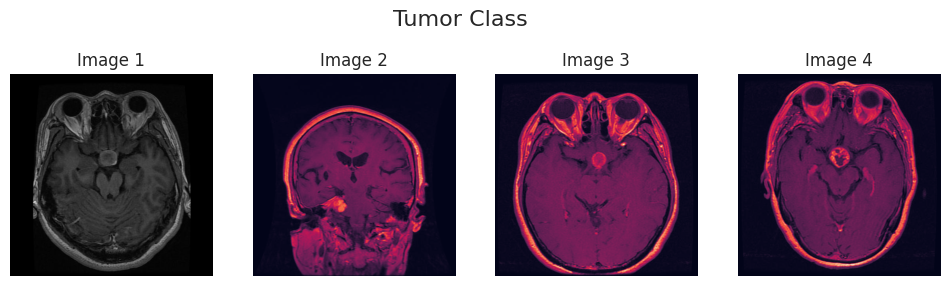

In [ ]:
# Display images from tumor class
plt.figure(figsize=(12, 6))
plt.suptitle('Tumor Class', fontsize=16)
for i, file in enumerate(tumor_files):
    img_path = os.path.join(tumor_dir, file)
    img = Image.open(img_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')
plt.show()


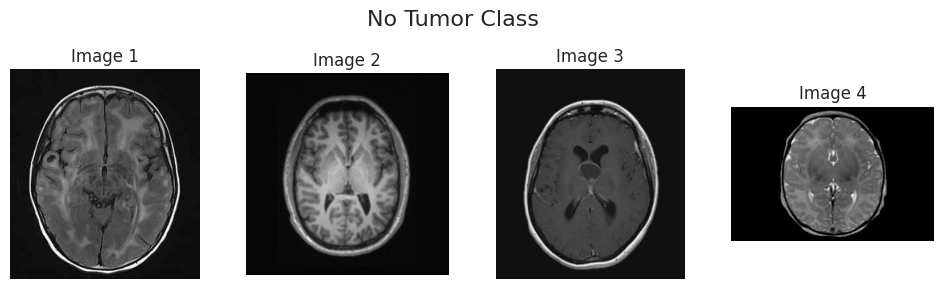

In [ ]:
# Display images from no tumor class
plt.figure(figsize=(12, 6))
plt.suptitle('No Tumor Class', fontsize=16)
for i, file in enumerate(no_tumor_files):
    img_path = os.path.join(no_tumor_dir, file)
    img = Image.open(img_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')
plt.show()


In [ ]:
def count_color_bw_images(directory):
    color_count = 0
    bw_count = 0
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        img = Image.open(file_path)
        if img.mode == "RGB":
            color_count += 1
        elif img.mode == "L":
            bw_count += 1
    return color_count, bw_count

# Path to the directories containing tumor and no tumor images
tumor_dir = "/content/tumor"
no_tumor_dir = "/content/no_tumor"


In [ ]:
# Count color and black and white images in tumor directory
tumor_color_count, tumor_bw_count = count_color_bw_images(tumor_dir)
# Count color and black and white images in no tumor directory
no_tumor_color_count, no_tumor_bw_count = count_color_bw_images(no_tumor_dir)

print("Tumor directory:")
print("Color images:", tumor_color_count)
print("Black and white images:", tumor_bw_count)

print("\nNo tumor directory:")
print("Color images:", no_tumor_color_count)
print("Black and white images:", no_tumor_bw_count)


Tumor directory:
Color images: 1959
Black and white images: 3064

No tumor directory:
Color images: 1967
Black and white images: 29


In [ ]:
def convert_to_bw_and_save(image_path, save_dir):
    img = Image.open(image_path)
    img_bw = img.convert("L")  # Convert to grayscale
    filename = os.path.basename(image_path)
    save_path = os.path.join(save_dir, filename)
    img_bw.save(save_path)
    return save_path

def convert_color_images_to_bw(directory, save_dir):
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):  # Ensure it's a file and not a directory
            save_path = convert_to_bw_and_save(file_path, save_dir)
            print(f"Converted {file} to black and white. Saved at {save_path}")


In [ ]:
# Path to the directories containing tumor and no tumor images
tumor_dir = "/content/tumor"
no_tumor_dir = "/content/no_tumor"

# Output directories for saving black and white images
tumor_bw_dir = "/content/tumor_bw"
no_tumor_bw_dir = "/content/no_tumor_bw"

# Create output directories if they don't exist
os.makedirs(tumor_bw_dir, exist_ok=True)
os.makedirs(no_tumor_bw_dir, exist_ok=True)



In [ ]:
# Convert color images to black and white and save them
convert_color_images_to_bw(tumor_dir, tumor_bw_dir)
convert_color_images_to_bw(no_tumor_dir, no_tumor_bw_dir)



Streaming output truncated to the last 5000 lines.
Converted Tr-me_1338.jpg to black and white. Saved at /content/tumor_bw/Tr-me_1338.jpg
Converted Tr-me_0518.jpg to black and white. Saved at /content/tumor_bw/Tr-me_0518.jpg
Converted Tr-me_0282.jpg to black and white. Saved at /content/tumor_bw/Tr-me_0282.jpg
Converted Tr-gl_0889.jpg to black and white. Saved at /content/tumor_bw/Tr-gl_0889.jpg
Converted Tr-me_1201.jpg to black and white. Saved at /content/tumor_bw/Tr-me_1201.jpg
Converted Te-pi_0261.jpg to black and white. Saved at /content/tumor_bw/Te-pi_0261.jpg
Converted Tr-pi_0165.jpg to black and white. Saved at /content/tumor_bw/Tr-pi_0165.jpg
Converted Tr-gl_0674.jpg to black and white. Saved at /content/tumor_bw/Tr-gl_0674.jpg
Converted Te-me_0275.jpg to black and white. Saved at /content/tumor_bw/Te-me_0275.jpg
Converted Tr-me_1299.jpg to black and white. Saved at /content/tumor_bw/Tr-me_1299.jpg
Converted Tr-pi_0202.jpg to black and white. Saved at /content/tumor_bw/Tr-pi_0

In [ ]:
def count_color_bw_images(directory):
    color_count = 0
    bw_count = 0
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        img = Image.open(file_path)
        if img.mode == "RGB":
            color_count += 1
        elif img.mode == "L":
            bw_count += 1
    return color_count, bw_count


In [ ]:
# Path to the directories containing tumor and no tumor images
tumor_dir = "/content/tumor_bw"
no_tumor_dir = "/content/no_tumor_bw"

# Count color and black and white images in tumor directory
tumor_color_count, tumor_bw_count = count_color_bw_images(tumor_dir)

# Count color and black and white images in no tumor directory
no_tumor_color_count, no_tumor_bw_count = count_color_bw_images(no_tumor_dir)
print("Tumor directory:")
print("Color images:", tumor_color_count)
print("Black and white images:", tumor_bw_count)

print("\nNo tumor directory:")
print("Color images:", no_tumor_color_count)
print("Black and white images:", no_tumor_bw_count)




Tumor directory:
Color images: 0
Black and white images: 5023

No tumor directory:
Color images: 0
Black and white images: 2000


In [ ]:
def count_items(folder):
    return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

# Count items in the "tumor" folder
tumor_count = count_items("tumor_bw")
print("Number of items in 'tumor' folder:", tumor_count)

# Count items in the "no_tumor" folder
no_tumor_count = count_items("no_tumor_bw")
print("Number of items in 'no_tumor' folder:", no_tumor_count)


Number of items in 'tumor' folder: 5023
Number of items in 'no_tumor' folder: 2000


In [ ]:
# Define the paths for tumor and no_tumor folders
tumor_path = "/content/tumor"
no_tumor_path = "/content/no_tumor"
# Get the list of files in each folder
tumor_files = [os.path.join(tumor_path, f) for f in os.listdir(tumor_path)]
no_tumor_files = [os.path.join(no_tumor_path, f) for f in os.listdir(no_tumor_path)]

In [ ]:
# Define the percentage of data to use for testing
test_size = 0.3

In [ ]:
# Split the data into train and test sets
tumor_train, tumor_test = train_test_split(tumor_files, test_size=test_size, random_state=42)
no_tumor_train, no_tumor_test = train_test_split(no_tumor_files, test_size=test_size, random_state=42)


In [ ]:
# Print the number of samples in each set
print("Tumor Train:", len(tumor_train))
print("Tumor Test:", len(tumor_test))
print("No Tumor Train:", len(no_tumor_train))
print("No Tumor Test:", len(no_tumor_test))

Tumor Train: 3516
Tumor Test: 1507
No Tumor Train: 1400
No Tumor Test: 600


In [ ]:
img_size = (145, 145)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 2

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=img_shape),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(class_count, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 143, 143, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 71, 71, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 69, 69, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,515,266 (32.48 MB)

 Trainable params: 8,515,266 (32.48 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
def preprocess_images(files):
    images = []
    for file in files:
        try:
            # Ensure file paths are correct
            if not os.path.exists(file):
                print(f"File not found: {file}")
                continue  # Skip if the file doesn't exist

            # Load image and resize
            image = load_img(file, target_size=(145, 145))

            # Convert image to array and normalize
            image = img_to_array(image) / 255.0
            images.append(image)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue  # Skip any problematic image
    return np.array(images)

# Preprocess train and test images
try:
    # Preprocess train images
    X_train_tumor_preprocessed = preprocess_images(tumor_train)
    X_train_no_tumor_preprocessed = preprocess_images(no_tumor_train)

    # Preprocess test images
    X_test_tumor_preprocessed = preprocess_images(tumor_test)
    X_test_no_tumor_preprocessed = preprocess_images(no_tumor_test)

    # Concatenate tumor and no_tumor preprocessed data
    X_train = np.concatenate([X_train_tumor_preprocessed, X_train_no_tumor_preprocessed], axis=0)
    y_train = np.concatenate([np.ones(len(X_train_tumor_preprocessed)),
                              np.zeros(len(X_train_no_tumor_preprocessed))], axis=0)

    X_test = np.concatenate([X_test_tumor_preprocessed, X_test_no_tumor_preprocessed], axis=0)
    y_test = np.concatenate([np.ones(len(X_test_tumor_preprocessed)),
                             np.zeros(len(X_test_no_tumor_preprocessed))], axis=0)

except Exception as e:
    print(f"Error during preprocessing: {e}")


In [ ]:
    # Concatenate tumor and no_tumor preprocessed data
    X_train = np.concatenate([X_train_tumor_preprocessed, X_train_no_tumor_preprocessed], axis=0)
    y_train = np.concatenate([np.ones(len(X_train_tumor_preprocessed)), np.zeros(len(X_train_no_tumor_preprocessed))], axis=0)
    X_test = np.concatenate([X_test_tumor_preprocessed, X_test_no_tumor_preprocessed], axis=0)
    y_test = np.concatenate([np.ones(len(X_test_tumor_preprocessed)), np.zeros(len(X_test_no_tumor_preprocessed))], axis=0)



In [42]:
    # Shuffle train data
    X_train, y_train = shuffle(X_train, y_train)


In [ ]:
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# except Exception as e:
#     print("Error occurred during data preprocessing or training:", e)



Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8086 - loss: 0.4053 - val_accuracy: 0.9380 - val_loss: 0.1897
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9548 - loss: 0.1258 - val_accuracy: 0.9472 - val_loss: 0.1574
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9698 - loss: 0.0876 - val_accuracy: 0.9604 - val_loss: 0.1262
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9825 - loss: 0.0507 - val_accuracy: 0.9583 - val_loss: 0.1164
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9839 - loss: 0.0471 - val_accuracy: 0.9756 - val_loss: 0.0691
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9917 - loss: 0.0245 - val_accuracy: 0.9685 - val_loss: 0.1045
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9746 - val_loss: 0.0789
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9910 - loss: 0.0277 - val_accu

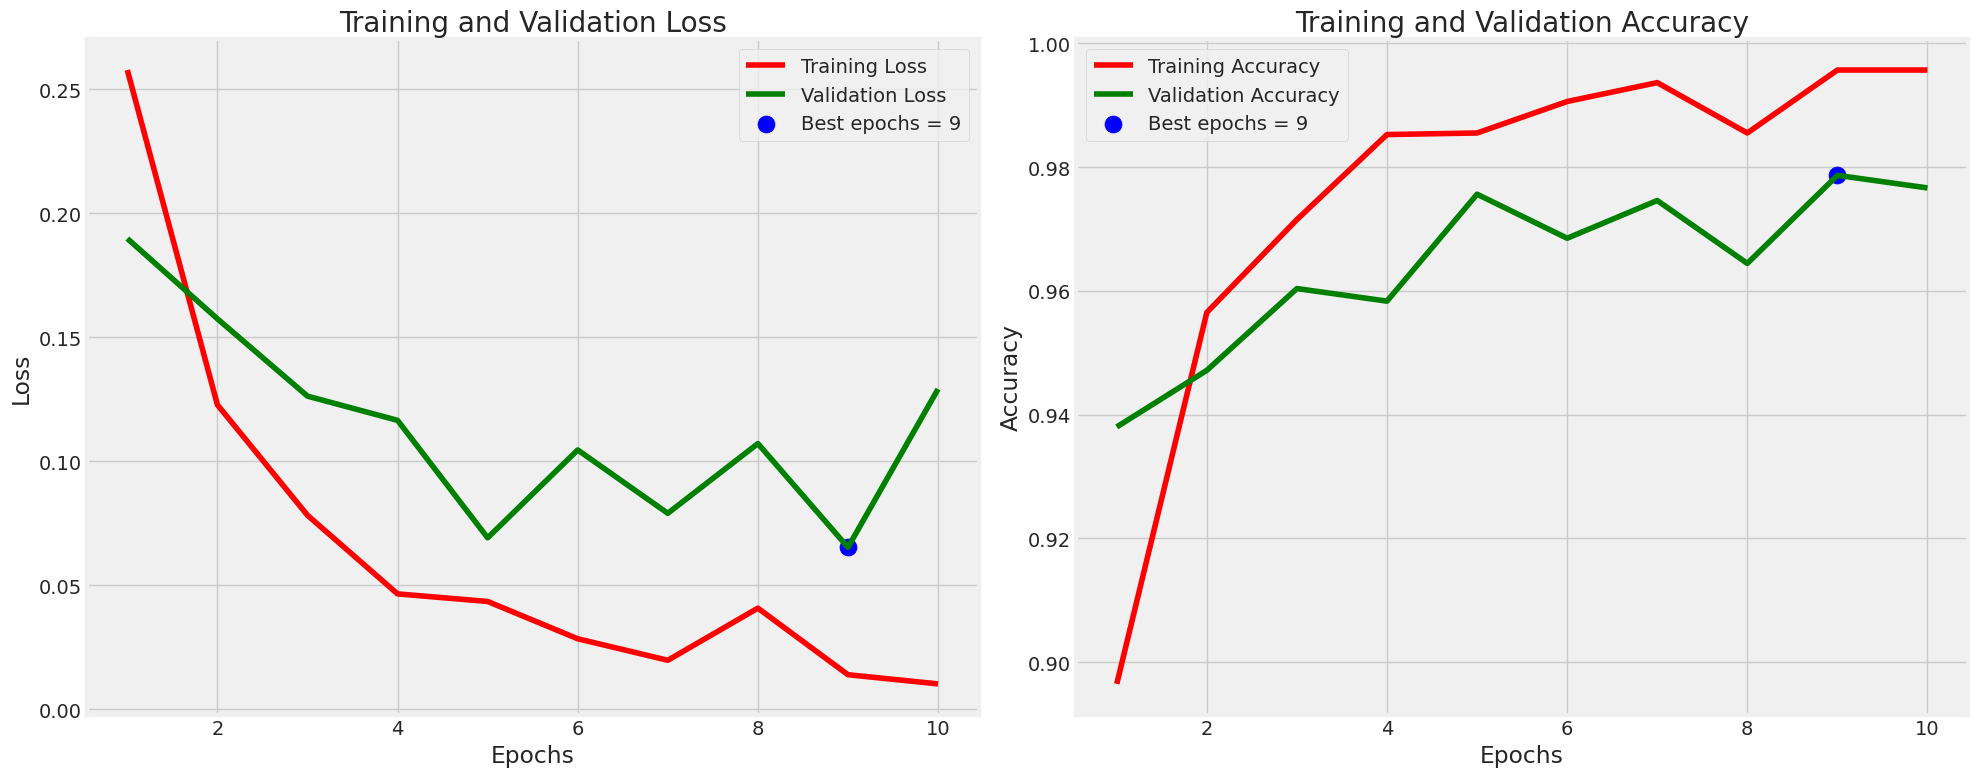

In [45]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
train_score = model.evaluate(X_train,y_train , steps =16 , verbose = 1)
test_score = model.evaluate(X_test,y_test , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.9971 - loss: 0.0096
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9873 - loss: 0.0826
Train Loss:  0.029949970543384552
Train Accuracy:  0.9936940670013428
--------------------
Test Loss:  0.09367506951093674
Test Accuracy:  0.9871855974197388


In [47]:
# Predict probabilities
y_pred_probs = model.predict(X_test)


66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 353ms/step


In [48]:
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


In [49]:
# Assuming you have true labels y_test
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)

print("Accuracy:", accuracy)



Accuracy: 0.9871855719031799


In [50]:
# Define your class labels
class_labels = ['No Tumor', 'Tumor']

In [51]:
# Path to the image file
path = "/content/no_tumor/Te-no_0015.jpg"

In [52]:
# Load and preprocess the image
img = load_img(path, target_size=(145, 145))
input_arr = img_to_array(img) / 255.0
input_arr = np.expand_dims(input_arr, axis=0)

In [53]:
# Predict the class probabilities
pred_probs = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [54]:
# Get the predicted class label
predicted_class = np.argmax(pred_probs)
predicted_label = class_labels[predicted_class]

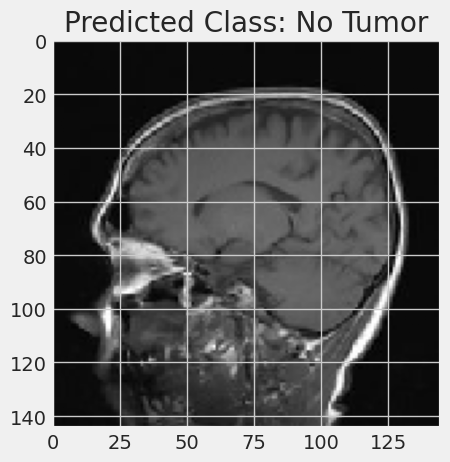

In [55]:
# Display the input image along with the predicted class label
plt.imshow(input_arr[0])
plt.title("Predicted Class: {}".format(predicted_label))
plt.show()

In [56]:
#save the model
model.save("/content/Bestmodel.h5")

Streamlit







In [57]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [58]:
%%writefile app.py

Writing app.py


In [61]:
! wget -q -O - ipv4.icanhazip.com

34.106.180.170


In [62]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.180.170:8501

⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


APP.PY

In [ ]:
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf

# Function to load and preprocess image
def load_and_preprocess_image(image_file, target_size=(145, 145)):
    image = Image.open(image_file)
    image = image.resize(target_size)
    image_array = np.array(image)
    if len(image_array.shape) == 2:
        image_array = np.stack((image_array,) * 3, axis=-1)
    image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Load your trained model
# Replace 'model_path' with the path to your trained model file
model = tf.keras.models.load_model("/content/Bestmodel.h5")
# Streamlit UI
st.title('Brain Tumor Detection')

# File uploader for MRI scan
uploaded_file = st.file_uploader("Upload brain MRI scan", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    st.image(uploaded_file, caption='Uploaded MRI scan', use_column_width=True)

    # Preprocess image and make prediction
    image_array = load_and_preprocess_image(uploaded_file)
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)
    # Display prediction result
    st.subheader('Prediction:')
    if predicted_class == 0:
        st.write('The model predicts that there is no tumor in the brain MRI scan.')
    else:
        st.write('The model predicts that there is a tumor in the brain MRI scan.')
